## Assignment 2: Classification

This notebook contains examples, plus the exercises for the second assignment, which should be submitted as instructed in the assignments [page](https://daniel-yukimura.github.io/assingments-image-processing-lab/).<br>

In this assignment we'll apply some of the methods we have seen in class for designing and training neural networks.

### Example: MNIST classifier.

MNIST, is a famous dataset containing 70,000 grayscale hand-written digits (0-9) and their associated values. PyTorch **torchvision.dataset** gives us access to a few datasets including this one. The dataset is divided as 60,000 training images and 10,000 for the test set.<br>
Our goal is to construct a neural network classifier that can read the digits in the image. This example should be seen as a starting point for the assignment exercises.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

#hyperparameter:
batch_size = 100

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

classes = ('0','1','2','3','4','5','6','7','8','9')

    3     1     5     4     6     5     4     8


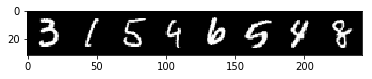

In [3]:
# This code will plot some examples
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


def imshow(img):
#     img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:8]))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [7]:
# hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
learning_rate = 0.1
#creating model
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/5], Step [100/600], Loss: 0.7229
Epoch [1/5], Step [200/600], Loss: 0.4161
Epoch [1/5], Step [300/600], Loss: 0.3334
Epoch [1/5], Step [400/600], Loss: 0.3137
Epoch [1/5], Step [500/600], Loss: 0.3406
Epoch [1/5], Step [600/600], Loss: 0.3054
Epoch [2/5], Step [100/600], Loss: 0.1413
Epoch [2/5], Step [200/600], Loss: 0.3348
Epoch [2/5], Step [300/600], Loss: 0.4180
Epoch [2/5], Step [400/600], Loss: 0.2555
Epoch [2/5], Step [500/600], Loss: 0.1619
Epoch [2/5], Step [600/600], Loss: 0.1447
Epoch [3/5], Step [100/600], Loss: 0.2768
Epoch [3/5], Step [200/600], Loss: 0.1887
Epoch [3/5], Step [300/600], Loss: 0.1791
Epoch [3/5], Step [400/600], Loss: 0.1806
Epoch [3/5], Step [500/600], Loss: 0.2878
Epoch [3/5], Step [600/600], Loss: 0.1790
Epoch [4/5], Step [100/600], Loss: 0.1534
Epoch [4/5], Step [200/600], Loss: 0.1794
Epoch [4/5], Step [300/600], Loss: 0.2331
Epoch [4/5], Step [400/600], Loss: 0.2594
Epoch [4/5], Step [500/600], Loss: 0.1295
Epoch [4/5], Step [600/600], Loss:

In [9]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28)
        labels = labels
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy of the network on the 10000 test images: 96.16 %


### Exercise 1: Improving the MNIST classifier

In this exercise we want to improve our classifier's performance and apply some of the techniques presented in class.<br>
You should follow each of the following points, and comment on the improvements or issues caused by the changes. After completing the steps you should explain which setting works best. In this part you can apply your own modifications, and feel free to look up online for suggestions.
* Create a deeper network, test performance using 2 and 4 layers (you can try something like $500\times250$ and $500\times250\times100\times25$).
* Change the optimization method to **torch.optim.Adam**. Test it with both the one hidden layer model and multiple layers. You'll probably need to lower your **learning_rate**, observe how this is relevant when the number of layers is higher.
* Add dropout layers and observe how this affects performance.

### Exercise 2: CIFAR dataset

This time we'll use another dataset, the CIFAR10, also provided by the torchvision library. It contains images referent to classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

* Load the images as shown before, and use the fully-connected model you think is appropriated (the one you chose in exercise 1).
* Next, create a convolutional network with the following architecture:
  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.
* Train it for 20 epochs on the CIFAR-10 training set and test performance.
* Use different techniques to visualize performance. 
  - Create a function that shows examples from test set with true and predicted label
  - Plot the confusion matrix of your results.
  - Plot the images with worst performance, i.e. where it the network missclassified and the confidence of the network was low, i.e. the output probability was low.
  - (extra)  Add code to plot out the network weights as images, to visualize how the weights respond to an image.
  
  
You can check [here](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for some help.


### Exercise 3: Dogs vs Cats

Download the dataset on [http://files.fast.ai/data/dogscats.zip](http://files.fast.ai/data/dogscats.zip), there are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that you have to try to label. This time you will need to figure out a way to read and tranform the images into tensors.

* Train a CNN classifier on this dataset, you can start from the model suggested on exercise 2.
* Try to improve your result adding regularization (dropout for example).
* Repeat the visualization part from exercise 2.